In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df= pd.read_csv("cleaned_data.csv")
print(df.shape)
df.head()

(26664, 30)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

# Selecting Features

In [5]:
features_response= ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']

In [6]:
corr= df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


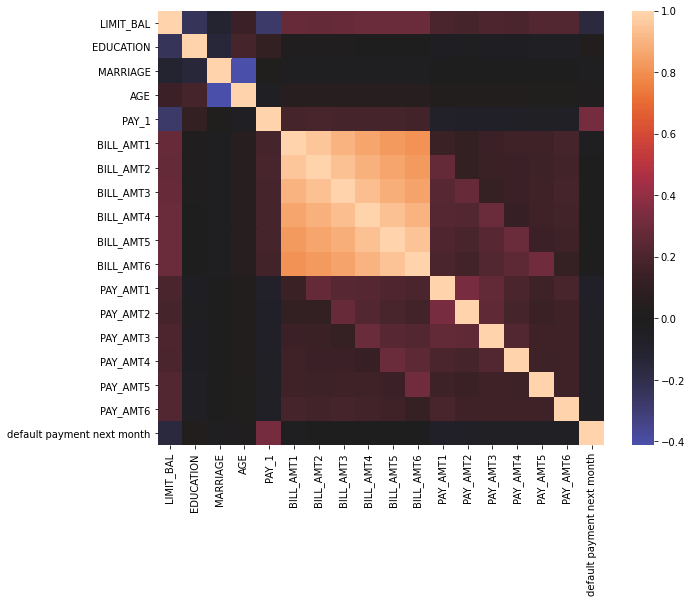

In [7]:
plt.figure(figsize= (10,8))

sns.heatmap(corr, xticklabels= corr.columns.values, yticklabels= corr.columns.values, center=0)
plt.show()

In [8]:
X= df[features_response].iloc[:,:-1].values
y= df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [9]:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value]= f_classif(X,y)

In [10]:
f_test_df= pd.DataFrame({'Feature': features_response[:-1], 'F statistic': f_stat, 'p value': f_p_value})
f_test_df.sort_values("p value")

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [11]:
from sklearn.feature_selection import SelectPercentile

selector= SelectPercentile(f_classif, percentile=20)

selector.fit(X,y)

SelectPercentile(percentile=20)

In [12]:
best_feature_ix= selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [13]:
features= features_response[:-1]
best_features= [features[counter] for counter in range(len(features)) if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

# Using the selected features

In [23]:
X= df[['LIMIT_BAL', 'PAY_1']]
y= df['default payment next month']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21331, 2), (21331,), (5333, 2), (5333,))

# Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression
lr_model= LogisticRegression()

In [26]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [30]:
pred_train= lr_model.predict(X_train)
print(pred_train)

[0 0 0 ... 0 0 0]


In [27]:
y_pred= lr_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score

In [32]:
train_a= accuracy_score(y_train,pred_train)
print(train_a)

0.7766161923960433


In [33]:
test_a= accuracy_score(y_test,y_pred)
print(test_a)

0.7845490343146446


# Naive Bayes 

In [34]:
from sklearn.naive_bayes import GaussianNB
nb_model= GaussianNB()

In [37]:
nb_model.fit(X_train, y_train)

nb_pred_train= nb_model.predict(X_train)
print(nb_pred_train)

[0 0 0 ... 0 0 0]


In [38]:
nb_train_a= accuracy_score(y_train, nb_pred_train)
print(nb_train_a)

0.7766161923960433


In [39]:
y_pred= nb_model.predict(X_test)

nb_test_a= accuracy_score(y_test, y_pred)
print(nb_test_a)

0.7845490343146446


# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier()

In [42]:
rf_model.fit(X_train,y_train)

rf_pred_train= rf_model.predict(X_train)
print(rf_pred_train)

[0 1 0 ... 0 0 0]


In [43]:
rf_train_a= accuracy_score(y_train, rf_pred_train)
print(rf_train_a)

0.8217617551919741


In [44]:
y_pred= rf_model.predict(X_test)

rf_test_a= accuracy_score(y_test, y_pred)
print(rf_test_a)

0.8166135383461466


# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier()

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
knn_pred_train= knn_model.predict(X_train)

knn_train_a= accuracy_score(y_train, knn_pred_train)
print(knn_train_a)

0.794618161361399


In [48]:
y_pred= knn_model.predict(X_test)

knn_test_a= accuracy_score(y_test, y_pred)
print(knn_test_a)

0.7873617101068817


# Accuracy on test data
LR- 0.7845490343146446

NB- 0.7845490343146446

RF- 0.8166135383461466

KNN- 0.7873617101068817

Thus we will use Random Forest Classifier as it has the maximum accuracy.

In [49]:
import pickle

pickle.dump(rf_model, open("ccd_model.pkl","wb"))

Dumping the model in a pickle file to be used for prediction in our web app.